In [1]:
import iberoSignalPro.preprocesa as ib
from BCI2kReader import BCI2kReader as b2k
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sgnl
from scipy.interpolate import interp1d
import mne
import os
import winsound

In [2]:
filename = r'c:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\FernandoMorales004\FernandoMoralesS004R01.dat'
file = b2k.BCI2kReader(filename)
fs = int(file._samplingrate())
signals = np.array(file._signals())
states = (file._states())
t = np.arange(0, len(signals[0, :]), 1)/fs

In [3]:
fs

4800

In [4]:
sosemg = sgnl.butter(3, [10*2/fs, 500*2/fs], "band", output="sos")                                                              
sosisok = sgnl.butter(2, [(20*2)/fs], "low", output="sos")


In [5]:
t_min = 0 * fs
t_max = -1

t = np.arange(0, len(signals[1, t_min:t_max])/fs, 1/fs)

pos =  sgnl.sosfiltfilt(sosisok, signals[16, t_min:t_max])
vel = sgnl.sosfiltfilt(sosisok, signals[17, t_min:t_max])
torq = sgnl.sosfiltfilt(sosisok, signals[18, t_min:t_max])


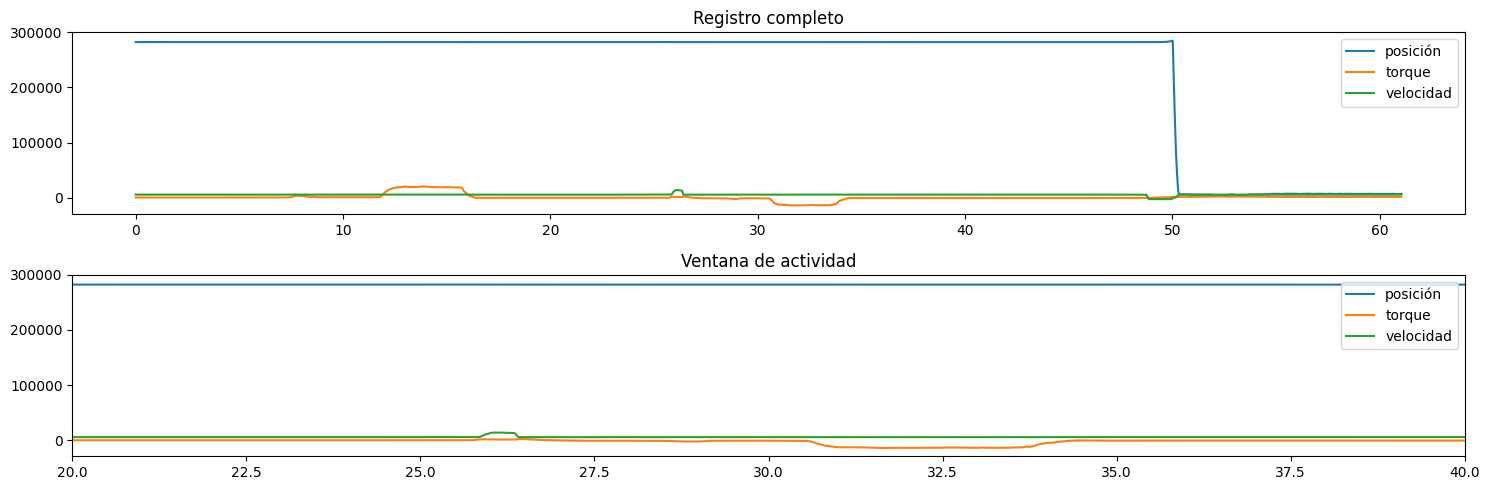

In [6]:
plt.figure(figsize=(15, 5))

# Subplot 1: Registro completo
plt.subplot(2, 1, 1)
plt.title("Registro completo")
plt.plot(t, pos, label="posición")
plt.plot(t, torq, label="torque")
plt.plot(t, vel, label="velocidad")
plt.legend(loc="upper right")

# Subplot 2: Ventana de actividad
plt.subplot(2, 1, 2)
plt.title("Ventana de actividad")
plt.plot(t, pos, label="posición")
plt.plot(t, torq, label="torque")
plt.plot(t, vel, label="velocidad")
plt.xlim(20, 40)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [7]:
emg_agon = ib.normaliza(sgnl.sosfiltfilt(sosemg, signals[24, t_min:t_max]), options="std")
emg_anta = ib.normaliza(sgnl.sosfiltfilt(sosemg, signals[25, t_min:t_max]), options="std")

In [8]:

env_agon =  ib.obtenerEnvolvente(emg_agon, options="rms", param = 300)
env_anta =  ib.obtenerEnvolvente(emg_anta, options="rms", param = 300)


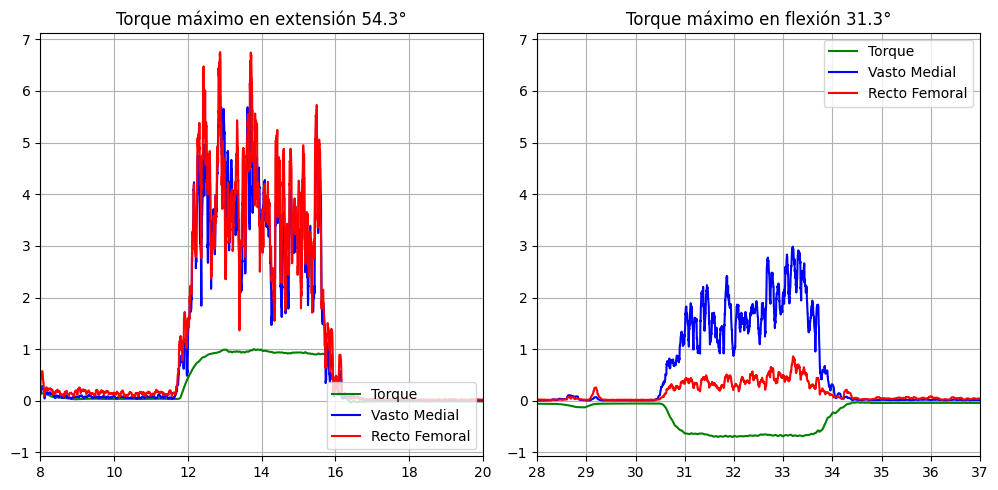

In [9]:
plt.figure(figsize=((10, 5)))

torq = torq / torq.max()

plt.subplot(1, 2, 1)
plt.plot(t, torq, c="g", label="Torque")

plt.plot(t, env_anta, c="b", label="Vasto Medial")
plt.plot(t, env_agon, c="r", label = "Recto Femoral")
plt.xlim(8, 20)
plt.legend(loc="lower right")
plt.title(f"Torque máximo en extensión 54.3°")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, torq, c="g", label="Torque")
plt.plot(t, env_anta, c="b", label="Vasto Medial")
plt.plot(t, env_agon, c="r", label = "Recto Femoral")
plt.xlim(28, 37)
plt.legend(loc="upper right")
plt.title(f"Torque máximo en flexión 31.3°")
plt.grid()


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Envolvente Recto Femoral')

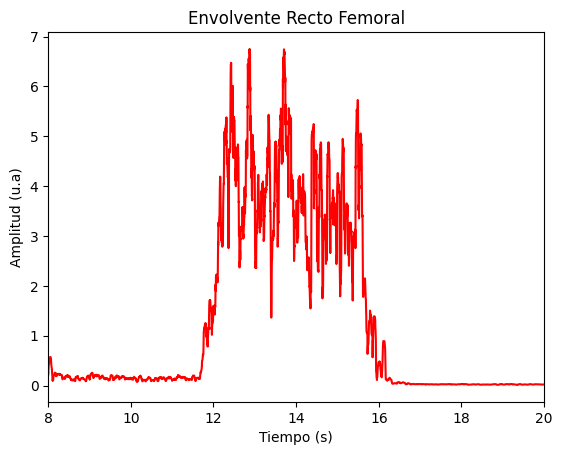

In [10]:
plt.plot(t, env_agon, c = "r")
plt.xlim(8, 20)
plt.ylabel("Amplitud (u.a)")
plt.xlabel("Tiempo (s)")
plt.title("Envolvente Recto Femoral") 


In [11]:
df_eeg = pd.read_csv(r"c:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\Sujetos\AndreaBosch\S1\10deTorqueEEG.csv")
df_eeg.head(10)

,FC3,FCz,FC4,CP3,C3,C1,Cz,C2,C4,CP4,P3,Pz,P4,O1,Oz,O2,A1,A2,bin
0,0.718900,1.505783,-0.291247,-0.676059,-0.198619,-0.568131,0.151858,-0.157546,-0.195351,-2.615412,0.123721,-0.190415,-1.233900,1.257439,0.726367,1.234266,0.591784,0.589757,1.0
1,0.749794,1.399769,-0.274854,-0.741671,-0.145428,-0.547105,0.163325,-0.177631,-0.261966,-2.559073,0.068733,-0.192776,-1.323067,1.196951,0.782669,1.073808,0.790472,0.790806,1.0
2,0.772505,1.293690,-0.258534,-0.795634,-0.096393,-0.524120,0.172001,-0.194389,-0.320247,-2.489572,0.018797,-0.193433,-1.393853,1.134109,0.828164,0.921579,0.964056,0.966515,1.0
3,0.788660,1.191660,-0.243449,-0.839081,-0.052412,-0.500624,0.177771,-0.207960,-0.370164,-2.413306,-0.025223,-0.192751,-1.448328,1.072614,0.864356,0.781977,1.112328,1.116653,1.0
4,0.799950,1.096432,-0.230426,-0.873571,-0.013810,-0.477727,0.180697,-0.218656,-0.412259,-2.335453,-0.063073,-0.191090,-1.489118,1.015149,0.893011,0.657435,1.236842,1.242772,1.0
5,0.807909,1.009543,-0.219983,-0.900736,0.019493,-0.456188,0.180946,-0.226856,-0.447373,-2.259767,-0.094914,-0.188763,-1.518871,0.963413,0.915842,0.548840,1.340075,1.347363,1.0
6,0.813825,0.931608,-0.212400,-0.922077,0.047816,-0.436474,0.178719,-0.232936,-0.476433,-2.188705,-0.121150,-0.186026,-1.539965,0.918313,0.934343,0.456021,1.424807,1.433227,1.0
7,0.818726,0.862628,-0.207787,-0.938864,0.071598,-0.418833,0.174225,-0.237236,-0.500333,-2.123698,-0.142295,-0.183077,-1.554384,0.880176,0.949725,0.378181,1.493731,1.503083,1.0
8,0.823412,0.802233,-0.206144,-0.952123,0.091308,-0.403371,0.167661,-0.240045,-0.519862,-2.065438,-0.158889,-0.180073,-1.563710,0.848953,0.962918,0.314207,1.549262,1.559369,1.0
9,0.828497,0.749867,-0.207407,-0.962650,0.107401,-0.390102,0.159206,-0.241598,-0.535687,-2.014121,-0.171453,-0.177134,-1.569167,0.824356,0.974605,0.262877,1.593463,1.604169,1.0


In [12]:
eeg = df_eeg.iloc[:, 0:-3].values

In [13]:
eeg.shape

(1906399, 16)

In [14]:
S, f, n = ib.sliding_PSD(eeg, N = fs * 2, Fs = fs, Nfft = 15_000, step = 0.0495)
alfa = ib.band_estimation(S, f, band = "alpha")
mu = ib.band_estimation(S, f, band = [10, 15])
beta = ib.band_estimation(S, f, band = "beta")
gamma = ib.band_estimation(S, f, band = "gamma")



In [26]:
index = np.where(f < 100)[0][-1]

In [27]:
import plotly.express as px

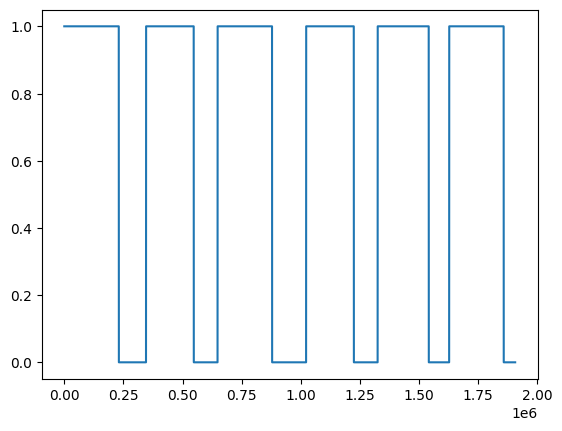

In [28]:
plt.plot(df_eeg["bin"])

In [29]:
np.where(f < 100)[0][-1]    // 11

28

In [30]:
from matplotlib.colors import LinearSegmentedColormap

In [31]:
%matplotlib inline

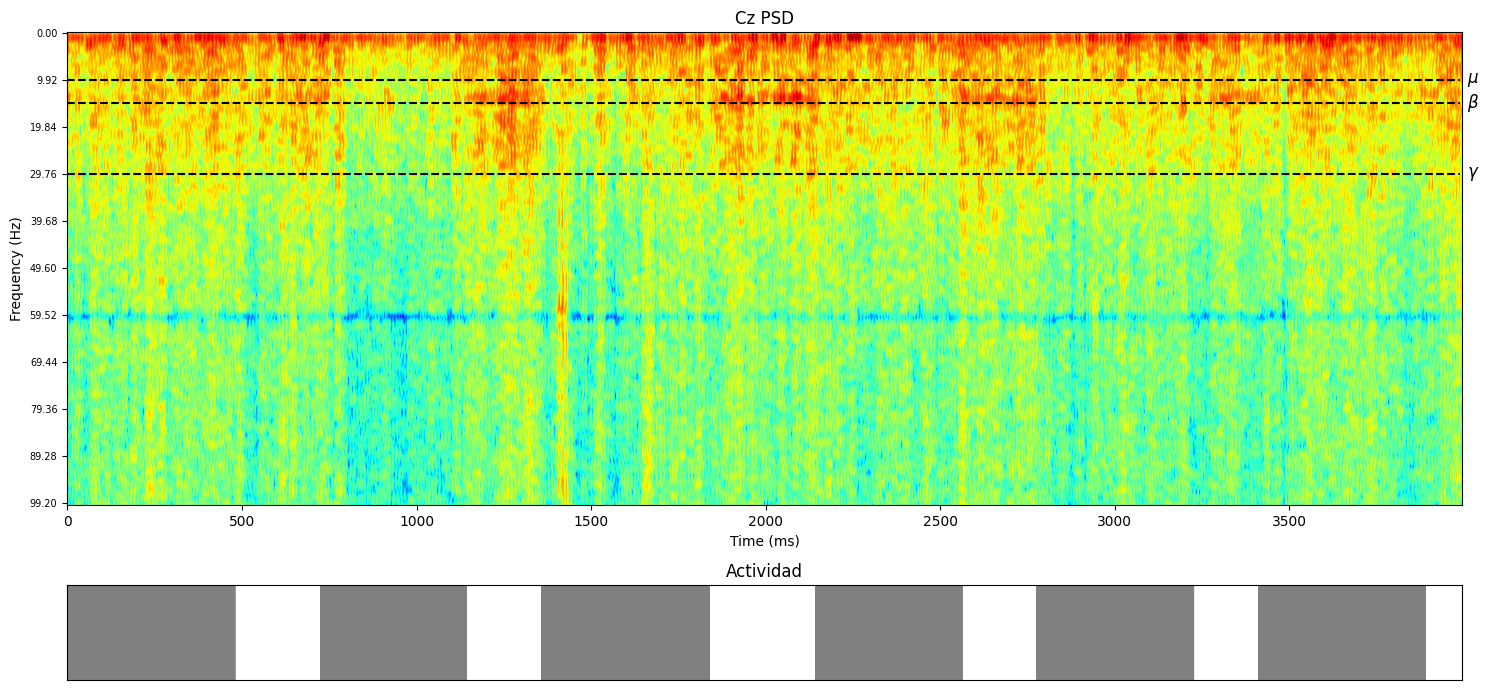

In [32]:
cmap_white_to_gray = LinearSegmentedColormap.from_list('white_to_gray', ['white', 'gray'])

fig, axs = plt.subplots(2, 1, figsize=(15, 7), gridspec_kw={'height_ratios': [4, 0.8]})

# Subplot 1: Visualización de X_train
im = axs[0].imshow(np.log10(S[5, :, :index]).T, aspect='auto', cmap='jet')

# Configurar los ticks del eje Y en pasos de 10
step = 31
yticks = range(0, len(f[:index]), step)
yticklabels = [f"{val:.2f}" for val in f[:index][::step]]
axs[0].set_yticks(yticks)
axs[0].set_yticklabels(yticklabels, fontsize=7)

# Añadir líneas horizontales y anotaciones
axs[0].hlines(y=31, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
axs[0].annotate(r'$\mu$', xy=(S.shape[1] - 5, 31), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

axs[0].hlines(y=46, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
axs[0].annotate(r'$\beta$', xy=(S.shape[1] - 5, 46), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

axs[0].hlines(y=93, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
axs[0].annotate(r'$\gamma$', xy=(S.shape[1] - 5, 93), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlabel('Time (ms)')

axs[0].set_title('Cz PSD')

# Subplot 2: Visualización de y_train_binary
axs[1].imshow(np.reshape(df_eeg["bin"], (1, -1)), aspect="auto", cmap=cmap_white_to_gray)
axs[1].set_title('Actividad')
axs[1].set_yticks([])
axs[1].set_xticks([])

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

plt.show()

In [43]:
S.shape[2]/100

75.01

In [46]:
index/100

3.12

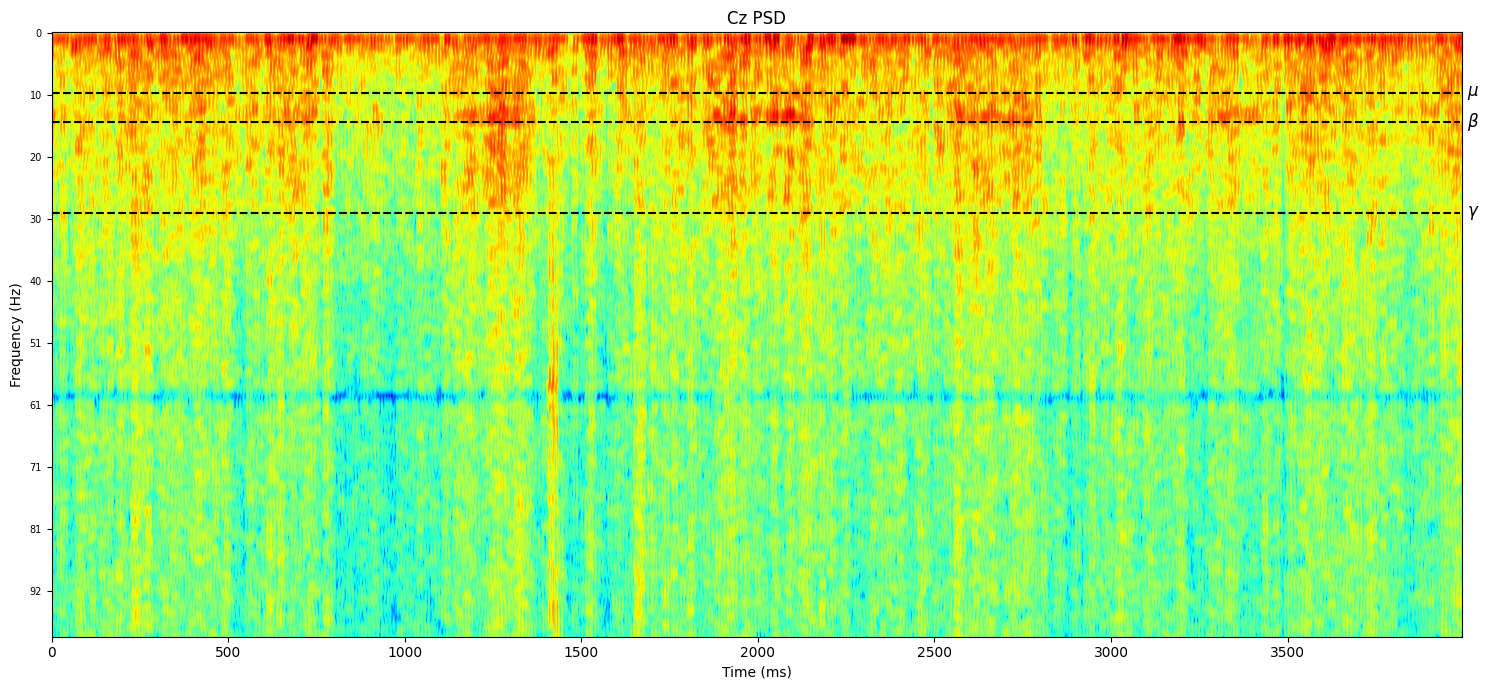

In [51]:

plt.figure(figsize=(15, 7))
plt.imshow(np.log10(S[5, :, :index]).T, aspect='auto', cmap='jet')

step = 32
yticks = range(0, len(f[:index]), step)
yticklabels = [f"{int(val)}" for val in f[:index][::step]]

ax = plt.gca()
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=7)

plt.hlines(y=31, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
plt.annotate(r'$\mu$', xy=(S.shape[1] - 5, 31), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

plt.hlines(y=46, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
plt.annotate(r'$\beta$', xy=(S.shape[1] - 5, 46), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

plt.hlines(y=93, xmin=0, xmax=S.shape[1] - 5, colors='k', linestyles='dashed')
plt.annotate(r'$\gamma$', xy=(S.shape[1] - 5, 93), xytext=(5, 0), textcoords='offset points', fontsize=12, color='k', va='center')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Time (ms)')

plt.title('Cz PSD')

plt.tight_layout()

plt.show()


In [52]:
%matplotlib inline

Text(0.5, 1.0, 'Cz BPTs')

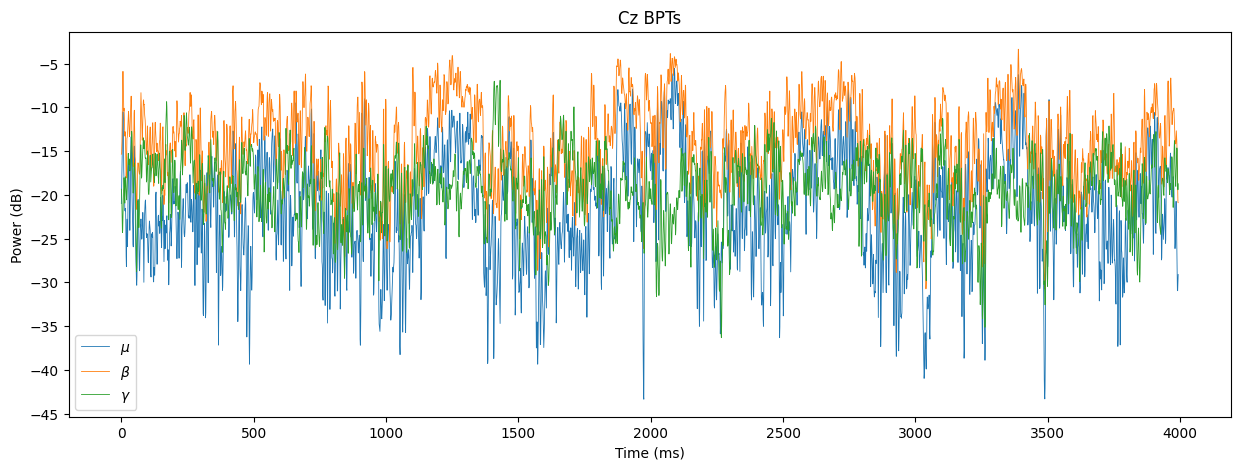

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(20 * np.log10(mu[5, :]), linewidth=0.6)
plt.plot(20 * np.log10(beta[5, :]), linewidth=0.6)
plt.plot(20 * np.log10(gamma[5, :]), linewidth=0.6)
plt.ylabel("Power (dB)")
plt.xlabel("Time (ms)")
plt.legend([r"$\mu$", r"$\beta$", r"$\gamma$"])
plt.title("Cz BPTs")